<a href="https://colab.research.google.com/github/Obreintelly/Mchezo_Pesa_Football_Prediction_Analysis/blob/main/Mchezo_Pesa_Football_Results_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Introduction and Background**


 **a. Specifying the Question**


> As a football Analyst recruited by Mchezopesa Ltd, I'm tasked with predicting the results of two football teams based on who's playing at Home, who's playing Away and whether or not it is a friendly match.





 **b. Defining the Success Metric**


> For this analysis, our metric for success would be a model that has a prediction score of atleast 85%.





 **c. Understanding the Context**


> The FIFA World Football Ranking is a ranking system of national teams in association football. The ranking is based on the results team's post with the most succesful teams being ranked the highest. There is both a Women's World Rankings- FIFA Women's World Rankings and Men's World Ranking- FIFA Men's World Rankings. As of 9th April 2021, Belgium was the most succesful men's team in the world.

> The rankings follow a points-based system (modeled after the ELo rating System) where points are awarded based on the performance of all FIFA recognised full international matches.








 **d. Recording the Experimental Design**



> a) Data Cleaning/Preparation


> b) Exploratory Data Analysis


> c) Building the Models



> d)Conclusions











# **2. Importing Libraries**

In [199]:
#Importing Pandas library
import pandas as pd

#Importing Numpy Library
import numpy as np

#Importing Matplotlib Library

import matplotlib.pyplot as plt

#Importing Seaborn Library

import seaborn as sns

#Importing Scipy
import scipy
#Importing SKLearn
import sklearn

# **3. Loading Our Datasets**

In [200]:
#We have two datasets:
# Fifa Ranking Dataset and a Dataset containing Match Results 

#Loading the Ranking Dataset
ranking= pd.read_csv('/content/fifa_ranking.csv')

#Loading the Resukts Dataset
results = pd.read_csv('/content/results.csv')

# **4. Previewing Our datasets**

In [201]:
#Displaying first 5 rows of the Ranking dataset
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [202]:
#Displaying last rows of Ranking Dataset
ranking.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [203]:
#Displaying first 5 rows of our Results Dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [204]:
#Displaying last 5 rows of our Results Dataset

results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [205]:
#Displaying Size pf our datasets
print('Fifa Ranking Dataset has: {} Rows, {} Columns'.format(*ranking.shape))

print('Fifa Results Dataset has: {} Rows, {} Columns'.format(*results.shape))

Fifa Ranking Dataset has: 57793 Rows, 16 Columns
Fifa Results Dataset has: 40839 Rows, 9 Columns


In [206]:
#Learning more about our dataset

ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [207]:
#Learning more about our dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [208]:
#Checking number of unique features in our dataset
print(ranking.nunique())



rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64


In [209]:
#Checking the Confederations we expect to see
ranking['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

In [210]:
#ranking.rank_date.unique()

In [211]:
#Checking number of unique features in our dataset
print(results.nunique())

date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
dtype: int64


In [212]:
#results.country.unique()

In [213]:
results.neutral.unique()

array([False,  True])

In [214]:
results.date.unique()

array(['1872-11-30', '1873-03-08', '1874-03-07', ..., '2019-07-18',
       '2019-07-19', '2019-07-20'], dtype=object)

# **5. Data Cleaning**

In [215]:
#Checking our datasets meet the Completeness Principle
#Are there any duplicates in the ranking dataset?

ranking.duplicated().any().sum()

1

In [216]:
#Dropping the duplicates
ranking = ranking.drop_duplicates()

In [217]:
#Are there any duplicates in the results dataset?
results.duplicated().any().sum()

0

In [218]:
#Checking for any missing values
ranking.isna().any().sum()

0

In [219]:
#Checking for any missing values
results.isna().any().sum()

0

In [220]:
#To answer the question under study, we need to to merge the two datasets.
#Key question is how we do it and on which columns?
#The country feature is not helpful because in the results dataset, this refers to where a match was played. 
#We know FIFA rankings are updated on a monthly basis. As such merging our datasets on Year and Month will make sense
#We create the Year and Month columns in both our datasets
ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year
ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month


results['year'] = pd.DatetimeIndex(results['date']).year
results['month'] = pd.DatetimeIndex(results['date']).month


In [221]:
#Merging our datasets

fifa_df = results.merge(ranking, left_on=['year', 'month'], right_on=['year', 'month'], how='inner')


In [222]:
fifa_df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,Colombia,False,1993,8,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [223]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4291108 entries, 0 to 4291107
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   date                     object 
 1   home_team                object 
 2   away_team                object 
 3   home_score               int64  
 4   away_score               int64  
 5   tournament               object 
 6   city                     object 
 7   country                  object 
 8   neutral                  bool   
 9   year                     int64  
 10  month                    int64  
 11  rank                     int64  
 12  country_full             object 
 13  country_abrv             object 
 14  total_points             float64
 15  previous_points          int64  
 16  rank_change              int64  
 17  cur_year_avg             float64
 18  cur_year_avg_weighted    float64
 19  last_year_avg            float64
 20  last_year_avg_weighted   float64
 21  two_year

In [224]:
#Checking Size of Our new dataset
fifa_df.shape

(4291108, 27)

In [225]:
#Checking number of unique values in our dataset
fifa_df.nunique()

date                        4974
home_team                    292
away_team                    287
home_score                    23
away_score                    21
tournament                    72
city                        1583
country                      231
neutral                        2
year                          26
month                         12
rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
dtype: int64

In [226]:
#Checking for duplicates
fifa_df.duplicated().any().sum()

0

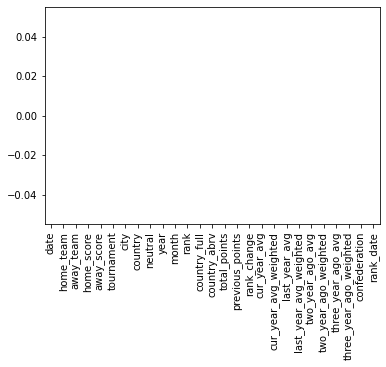

In [227]:
#Checking for Missing Values
fifa_df.isna().sum().plot(kind='bar')

In [228]:
#Dropping any irrelevant columns
#Country Abbreviation and Date do not add any necessary value for purposes of our study question
#We can therefore proceed to drop them from the dataset
fifa_df.drop(['date', 'country_abrv'], axis=1, inplace=True)

# **5 (a) Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


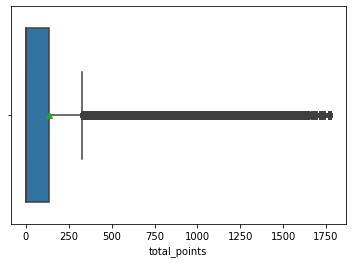

In [229]:
#Checking for Outliers in Our Dataset
bplot =sns.boxplot(fifa_df.total_points, showmeans=True)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


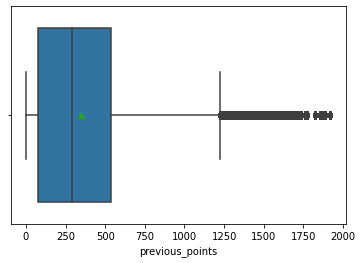

In [230]:
bplot =sns.boxplot(fifa_df.previous_points, showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


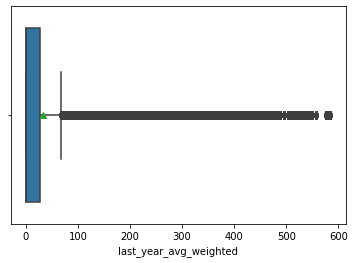

In [231]:
bplot = sns.boxplot(fifa_df.last_year_avg_weighted, showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


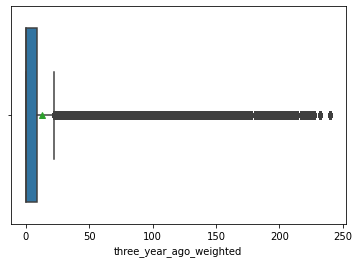

In [232]:
bplot =sns.boxplot(fifa_df.three_year_ago_weighted, showmeans=True)

In [233]:
#Although we have Outliers in our Dataset, they are infact actual points that teams received. 
#The consequences of curing these outliers woould be dire than non-action 

# **6. Feature Engineering**

In [234]:
#Dropping features that don't help with our research objective
#Country, Total Points, Previous Points, rank date, rank change, current year average, current year average weight, last year avergae, last year avaerage weighted
# two year average, weighted average two years ago, weighted average three years ago, average three years ago and Confederation do not have a bearing on 
# the ranking/performance of a team

#On the contrary, whether a team is the home or away side, the tournament type, where the match is played (Neutral ground or City at times-has to do with quality of pitch), 
#current rank of the two teams are most likely to have a bearing on the results of the football match and consequently the ranking of the teams


#We can therefore proceed to drop the features that do not help us.

In [235]:
fifa_df.drop(['country', 'total_points', 'previous_points', 'rank_change', 'cur_year_avg', 'cur_year_avg_weighted','last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted','three_year_ago_avg', 'three_year_ago_weighted', 'confederation', 'rank_date' ], axis=1, inplace=True)

In [236]:
#Displaying Size of our New Dataset
fifa_df.shape

(4291108, 11)

In [237]:
#Previewing the first 5 rows of our dataset
fifa_df.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,year,month,rank,country_full
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,1,Germany
1,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,2,Italy
2,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,3,Switzerland
3,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,4,Sweden
4,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,5,Argentina


In [238]:
#Analysing our dataset further, it appears the rank column has been organised in a descending format 
#and the Home and away teams are not matched to their respective countries.
#If we proceed with our analysis, we are likely to make errors.
#We need to match both the home and away teams with their correct current rank

In [239]:
#Matching the Home team to respective country
#Doing this will also give us the correct rank as rank is based on country
home_team = fifa_df[fifa_df.home_team== fifa_df.country_full]

home_team.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,year,month,rank,country_full
18,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,19,Colombia
236,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,False,1993,8,70,Peru
355,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,False,1993,8,22,Uruguay
594,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,False,1993,8,94,Venezuela
725,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,True,1993,8,58,Senegal


In [240]:
#Appropriate the rank column for the Home Team
home_team.rename(columns={'rank' : 'home_rank'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [241]:
#Dropping the Month and Country full columns as they may not be useful in our analysis
#We keep the neutral column and drop City as neutrality of venue can determine match outcome
home_team.drop(['month', 'city','country_full'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [242]:
home_team.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank
18,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19
236,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70
355,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22
594,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94
725,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58


In [243]:
#Matching the Away team to the respective country
#Doing this gives us the correct rank for the away team as this is based on country
away_team = fifa_df[fifa_df.away_team==fifa_df.country_full]
away_team.head()

,home_team,away_team,home_score,away_score,tournament,city,neutral,year,month,rank,country_full
66,Colombia,Paraguay,0,0,FIFA World Cup qualification,Barranquilla,False,1993,8,67,Paraguay
171,Peru,Argentina,0,1,FIFA World Cup qualification,Lima,False,1993,8,5,Argentina
368,Uruguay,Ecuador,0,0,FIFA World Cup qualification,Montevideo,False,1993,8,35,Ecuador
508,Venezuela,Brazil,1,5,FIFA World Cup qualification,San Cristóbal,False,1993,8,8,Brazil
692,Senegal,Zambia,0,0,FIFA World Cup qualification,Abidjan,True,1993,8,25,Zambia


In [244]:
#Appropriate the rank column for the Away Team
away_team.rename(columns={'rank' : 'away_rank'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [245]:
#Dropping the Month and Country full columns as they may not be useful in our analysis
#We keep the neutral column and drop City as neutrality of venue can determine match outcome
away_team.drop(['month', 'city','country_full'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [246]:
away_team.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,away_rank
66,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,67
171,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,5
368,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,35
508,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,8
692,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,25


In [247]:
#To have a single view of Home & Away teams and their rank among other features, we 
#Merge the Home and Away datasets

df = pd.merge(home_team, away_team, how='left', left_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament','neutral', 'year'], right_on=['home_team', 'away_team', 'home_score', 'away_score', 'tournament','neutral', 'year'])


In [248]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18789 entries, 0 to 18788
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   18789 non-null  object 
 1   away_team   18789 non-null  object 
 2   home_score  18789 non-null  int64  
 3   away_score  18789 non-null  int64  
 4   tournament  18789 non-null  object 
 5   neutral     18789 non-null  bool   
 6   year        18789 non-null  int64  
 7   home_rank   18789 non-null  int64  
 8   away_rank   17016 non-null  float64
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 1.3+ MB


In [250]:
#If a game of football, a team wins if they have more number of goals than the other team,
#Draws if they have same number of goals as the other team and loses if they have less number
#of goals than the other team in a match.

#Therefore, knowing the number of goals both teams score 
#we can determine if there was a win, draw or loss

#Let's create a new column called Status

df['wld'] = df['home_score'] - df['away_score']

# Using functions we will assign to a column whether the match resulted in a win, draw or loss

def outcome (goals): 
  if goals >0:
    return 'Win'
  elif goals <0:
    return 'Lose'
  else:
    return 'Draw'

#Application on our dataset
df['home_team_status'] = df.wld.apply(lambda x: outcome(x))


In [251]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,wld,home_team_status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0,0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0,-1,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0,0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0,-4,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0,0,Draw


In [252]:
#Dropping the wld placeholder column 
df.drop('wld', axis=1, inplace=True)

In [253]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0,Draw


In [254]:
#Checking our columns once more
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18789 entries, 0 to 18788
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   home_team         18789 non-null  object 
 1   away_team         18789 non-null  object 
 2   home_score        18789 non-null  int64  
 3   away_score        18789 non-null  int64  
 4   tournament        18789 non-null  object 
 5   neutral           18789 non-null  bool   
 6   year              18789 non-null  int64  
 7   home_rank         18789 non-null  int64  
 8   away_rank         17016 non-null  float64
 9   home_team_status  18789 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(4)
memory usage: 1.5+ MB


In [255]:
#Displaying size of our dataset
df.shape

(18789, 10)

In [256]:
#Checking for duplicates
df.duplicated().any()

True

In [257]:
#Dropping Duplicates
df = df.drop_duplicates()

Text(0.5, 1.0, 'Distribution of missing values')

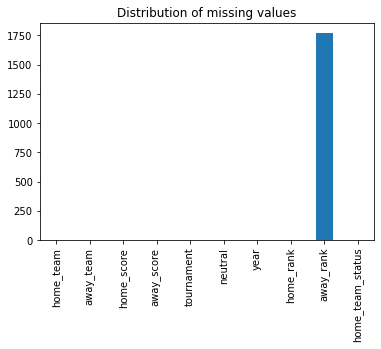

In [258]:
#Checking for Missing Values
df.isna().sum().plot(kind='bar')
plt.title('Distribution of missing values')

In [259]:
#Deriving percentage of missing values
100 *df.isna().sum()/len(df)

#Creating a function to help us derive the percentages

def percent_missing(df):
  percent_na = 100 *df.isna().sum()/len(df)
  percent_na = percent_na[percent_na>0].sort_values()

  return percent_na

percent_na = percent_missing(df)


In [260]:
percent_na

away_rank    9.481696
dtype: float64

In [261]:
#Checking entries with Missing Values
missing_away_rank = df[df['away_rank'].isna()]
missing_away_rank

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
11,Zimbabwe,Eswatini,2,0,Friendly,False,1993,50,NaN,Win
32,Iceland,United States,0,1,Friendly,False,1993,53,NaN,Lose
47,Norway,United States,1,0,Friendly,False,1993,3,NaN,Win
50,Wales,Czech Republic,2,2,FIFA World Cup qualification,False,1993,29,NaN,Draw
67,Nigeria,Ivory Coast,4,1,FIFA World Cup qualification,False,1993,18,NaN,Win
...,...,...,...,...,...,...,...,...,...,...
18697,Andorra,Cape Verde,0,0,Friendly,True,2018,130,NaN,Draw
18726,Lithuania,Iran,0,1,Friendly,True,2018,126,NaN,Lose
18737,France,United States,1,1,Friendly,False,2018,7,NaN,Draw
18745,Morocco,Iran,0,1,FIFA World Cup,True,2018,41,NaN,Lose


In [262]:
#missing_away_rank['home_team'].unique()

In [263]:
away_year = missing_away_rank[['away_team', 'year']]
away_year

,away_team,year
11,Eswatini,1993
32,United States,1993
47,United States,1993
50,Czech Republic,1993
67,Ivory Coast,1993
...,...,...
18697,Cape Verde,2018
18726,Iran,2018
18737,United States,2018
18745,Iran,2018


In [264]:
home_year_rank = df[['home_team', 'year', 'home_rank']]
home_year_rank

,home_team,year,home_rank
0,Colombia,1993,19
1,Peru,1993,70
2,Uruguay,1993,22
3,Venezuela,1993,94
4,Senegal,1993,58
...,...,...,...
18784,Senegal,2018,27
18785,Panama,2018,55
18786,England,2018,12
18787,France,2018,7


In [265]:
#Checking to see if we the missing away countries had corresponding home ranking 
#in the respective years 
home_year_rank[home_year_rank['home_team']=='United States']

,home_team,year,home_rank


In [266]:
#Checking to see if we the missing away countries had corresponding home ranking 
#in the respective years 
home_year_rank[home_year_rank['home_team']=='Iran']

,home_team,year,home_rank


In [267]:
#Potential Solution to the missing values
#df['away_rank']= df.groupby('home_rank')['away_rank'].transform(lambda value: value.fillna(value.mean()))
#df['away_rank']

In [268]:
#df.isna().any()

In [269]:
#The away countries with missing ranks didn't have corresponding home rankings
#in the relevenat years
#We have around 1770 missing values on the away rank column
#This is about 10% of the data points in that column
#We however proceed to drop them as any sort of cure
#will not follow the FIFA defined process for determining the ranking of a country
df = df.dropna()

In [270]:
#Checking if there are still any missing values
df.isna().any()

home_team           False
away_team           False
home_score          False
away_score          False
tournament          False
neutral             False
year                False
home_rank           False
away_rank           False
home_team_status    False
dtype: bool

In [271]:
from sklearn.model_selection import train_test_split

In [272]:
#help(train_test_split)

# **Saving our Clean Dataset**

our dataset is ready for analysis

In [273]:
df.to_csv('df.csv', index=False)

In [274]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0,Draw
1,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,70,5.0,Lose
2,Uruguay,Ecuador,0,0,FIFA World Cup qualification,False,1993,22,35.0,Draw
3,Venezuela,Brazil,1,5,FIFA World Cup qualification,False,1993,94,8.0,Lose
4,Senegal,Zambia,0,0,FIFA World Cup qualification,True,1993,58,25.0,Draw


# **7. Exploratory Data Analysis**

# **Univariate Analysis**

In [275]:
df['tournament'].value_counts()

Friendly                                6428
FIFA World Cup qualification            3950
UEFA Euro qualification                 1383
African Cup of Nations qualification     871
AFC Asian Cup qualification              387
                                        ... 
OSN Cup                                    4
Dragon Cup                                 4
Copa del Pacífico                          4
SKN Football Festival                      2
Copa América qualification                 2
Name: tournament, Length: 65, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Tournaments')

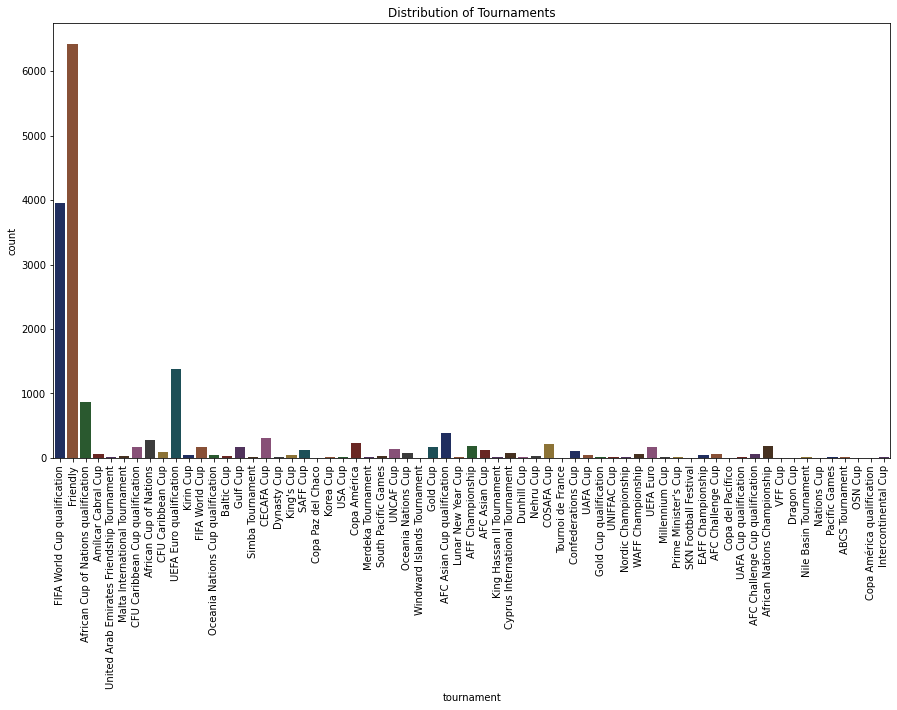

In [276]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(df.tournament, palette='dark', saturation=0.5)
plt.xticks(rotation=90)
plt.title('Distribution of Tournaments')

In [277]:
#help(sns.countplot)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Results')

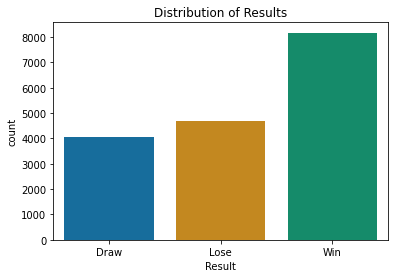

In [278]:
sns.countplot(df.home_team_status,palette='colorblind', saturation=0.75 )
plt.xlabel('Result')
plt.title('Distribution of Results')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Neutral and Non-neutral Venues')

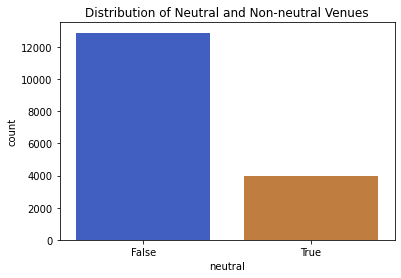

In [279]:
sns.countplot(df.neutral, palette='bright', saturation=0.5)
plt.title('Distribution of Neutral and Non-neutral Venues')

In [280]:
df[df['home_rank']==1].value_counts()

home_team  away_team  home_score  away_score  tournament          neutral  year  home_rank  away_rank  home_team_status
Spain      Venezuela  5           0           Friendly            False    2012  1          46.0       Win                 1
           Uruguay    3           1           Friendly            True     2013  1          16.0       Win                 1
Brazil     Iceland    3           0           Friendly            False    1994  1          39.0       Win                 1
           Honduras   2           1           Gold Cup            True     2003  1          41.0       Win                 1
           Guatemala  3           0           Friendly            False    2005  1          60.0       Win                 1
                                                                                                                          ..
France     Scotland   5           0           Friendly            False    2002  1          51.0       Win                 1
     

In [281]:
#There have been 160 matches played where the Home team was the best ranked team in the world

In [282]:
#Summary Statistics for our dataset.
df.describe()

,home_score,away_score,year,home_rank,away_rank
count,16888.000000,16888.000000,16888.00000,16888.000000,16888.000000
mean,1.603505,1.068688,2006.50077,76.060043,78.884060
std,1.615220,1.245501,6.80354,50.845940,51.994777
min,0.000000,0.000000,1993.00000,1.000000,1.000000
25%,0.000000,0.000000,2001.00000,33.000000,35.000000
50%,1.000000,1.000000,2007.00000,70.000000,72.000000
75%,2.000000,2.000000,2012.00000,112.000000,115.000000
max,31.000000,15.000000,2018.00000,209.000000,209.000000


In [283]:
df[df['home_score']==31]

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
4717,Australia,American Samoa,31,0,FIFA World Cup qualification,False,2001,77,203.0,Win


In [284]:
df[df['away_score']==15]

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
7828,Guam,Hong Kong,0,15,EAFF Championship,True,2005,204,124.0,Lose
9609,American Samoa,Vanuatu,0,15,South Pacific Games,True,2007,199,167.0,Lose


In [285]:
#The mean score for a Home team is 1.6 or 2 goals
#For an away time the mean score is 1.06
# The highest ever score by a home team is 31 goals scored by Australia against American Samoa in 2001. 
#The most goals an away team has scored in a match is 15 goals. 2 home teams have managed this feat
# they are Hong Kong against Guam (15:0) in 2005 and Vanuatu against American Samoa (15:0) in 2007.

In [286]:
df.home_score.mode()

0    1
dtype: int64

In [287]:
df.away_score.mode()

0    0
dtype: int64

# **Bivariate Analysis**

Text(0.5, 1.0, 'Heat map of the various features in our dataset')

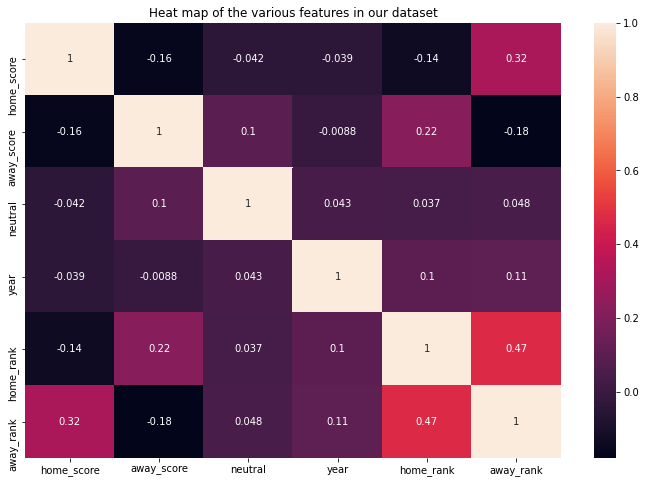

In [288]:
#Visualizing the correlation between the various features in our dataset
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat map of the various features in our dataset')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


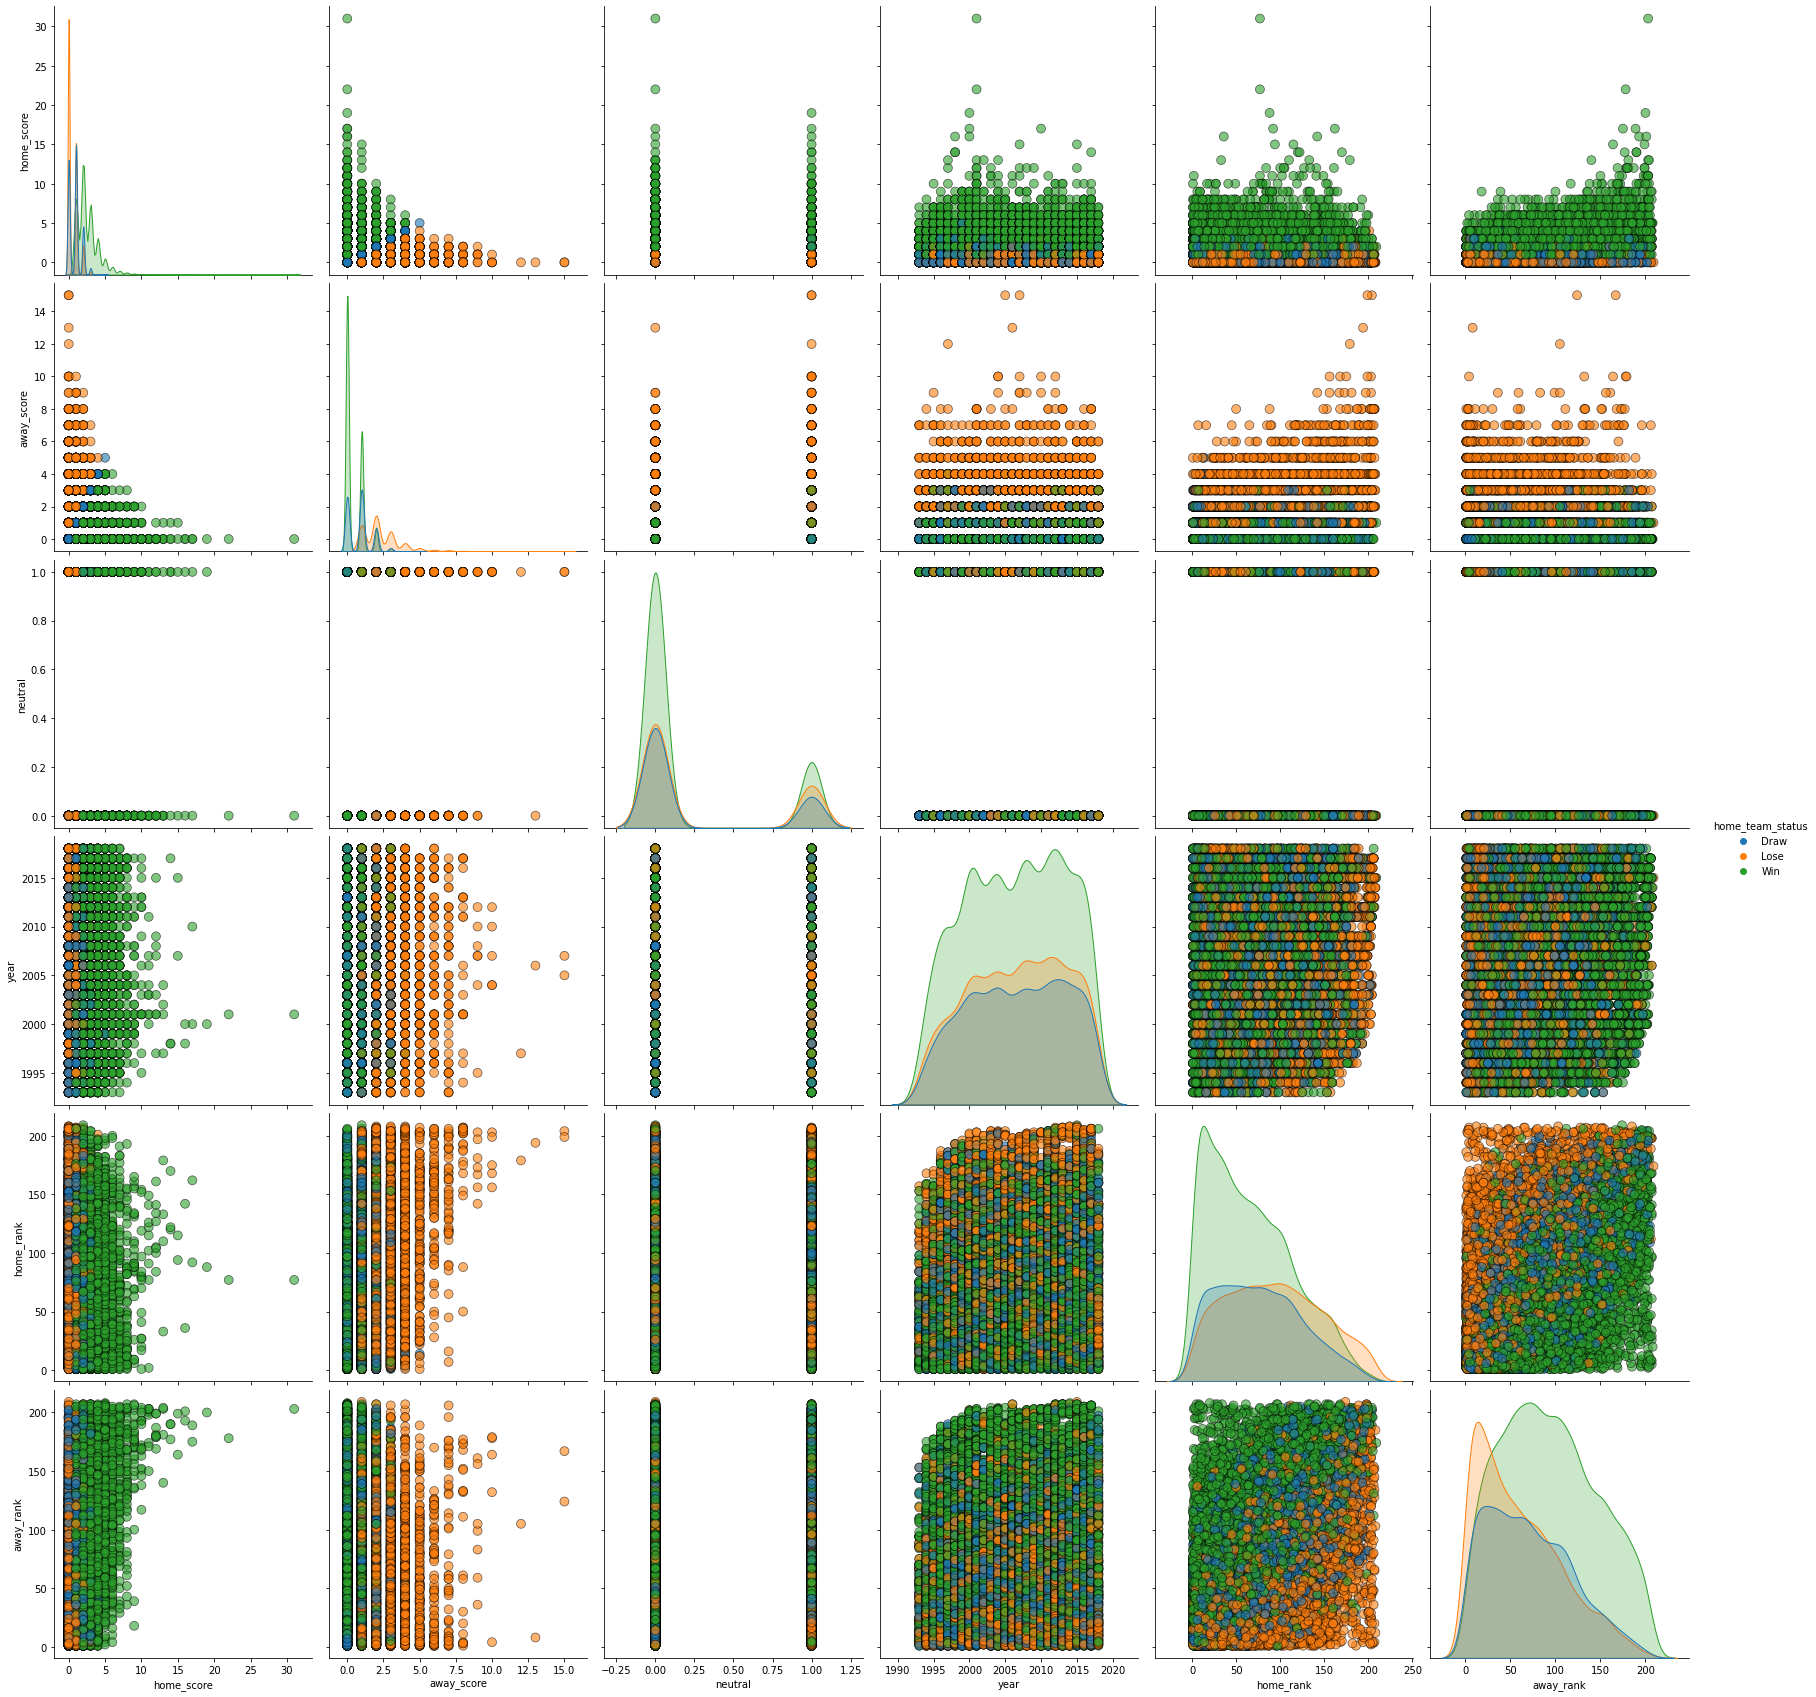

In [289]:
#Crossplots of features in our dataset
sns.pairplot(df, hue='home_team_status', diag_kind='kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size= 4 )


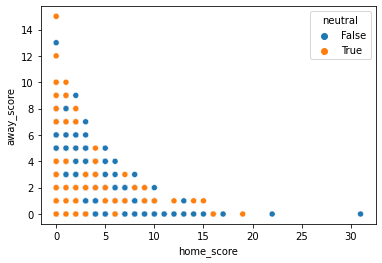

In [290]:
sns.scatterplot(x='home_score', y='away_score', data=df, hue='neutral')

In [291]:
# Creating our Empirical Cumulative Frequency Distribution function
def ecdf(data):
    """ 
    This function creates the x and y axis for an ecdf
    plot given the data as input.
    """
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    return xaxis, yaxis

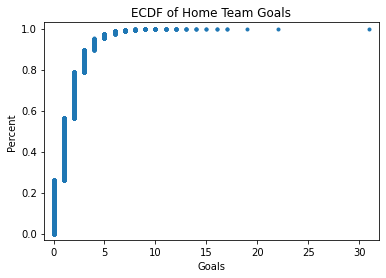

In [292]:
# Creating the xaxis and yaxis for our ecdf on home and away goals
x,y = ecdf(df['home_score'])

# Plotting our ecdf
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of Home Team Goals')
plt.xlabel('Goals')
plt.ylabel('Percent')
plt.margins(0.03)


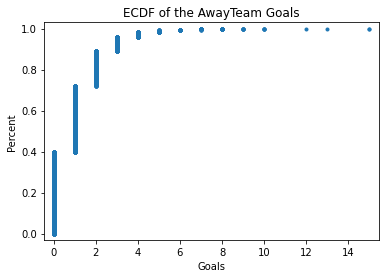

In [293]:
#Ecdf for away goals
x,y = ecdf(df['away_score'])

# Plotting our ecdf
plt.plot(x,y,linestyle='none',marker='.')
plt.title('ECDF of the AwayTeam Goals')
plt.xlabel('Goals')
plt.ylabel('Percent')
plt.margins(0.03)


# **8. Implementing the Solution**

# **Multicollinearity Check**

In [294]:
#The Classical Linear Regression Model assumes the following:
#1. Linearity, 2. No endogeneity, 3. Normality & Homoscedsticity
#4. No autocorrelation and 5. No multicollinearity

#Multicollinearity is observed when two or more explanatory variables
#are very highly correlated

#The problem with ignoring multicollinearity if present is that
# 1. our R2 will be high but the individual coefficents will
#have high standard errors
#2. THe regression becomes very sensitive to small changes 
#in the specification
#As such confidence intervals for the parameters will be very
#wide, and significance tests might yield inappropriate conclusions
#3. Our model may be trained inefficiently 

In [295]:
df.head(1)

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,19,67.0,Draw


In [296]:
#Given that we have non-numeric data, we will need to convert to 
#a format that would allow us to work on it. 
#Label Encoding is a potential solution. We leverage SK Learn to use it

from sklearn.preprocessing import LabelEncoder

In [297]:
#Creating an instance of labelencoder 

labelencoder = LabelEncoder()

#Creating the Numerical Values

df['home_team']= labelencoder.fit_transform(df.home_team)

df['away_team'] = labelencoder.fit_transform(df.away_team)

df['tournament'] = labelencoder.fit_transform(df.tournament)
df['neutral'] = labelencoder.fit_transform(df.neutral)


In [298]:
df.head(2)

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,41,137,0,0,26,0,1993,19,67.0,Draw
1,138,8,0,1,26,0,1993,70,5.0,Lose


In [299]:
#We can now check for multicollinearity by leveraging
#Correlation and Variance Inflection Factor (VIF)
#VIF is a measure of how much variance of a regression coefficient in a model
#increases if the explanatory variables are correlated.
#A VIF of one means there is no correlation
#If the VIF is between 5 & 10, then there is a big problem and solutions
#for the high correlation have to be explored.


#Checking the objective of our study once more:

#What to train given:

#Rank of home team
#Rank of away team
#Tournament type
#Model 1: Predict how many goals the home team scores.

#Model 2: Predict how many goals the away team scores.

Text(0.5, 1.0, 'Correlation of Our Regressors')

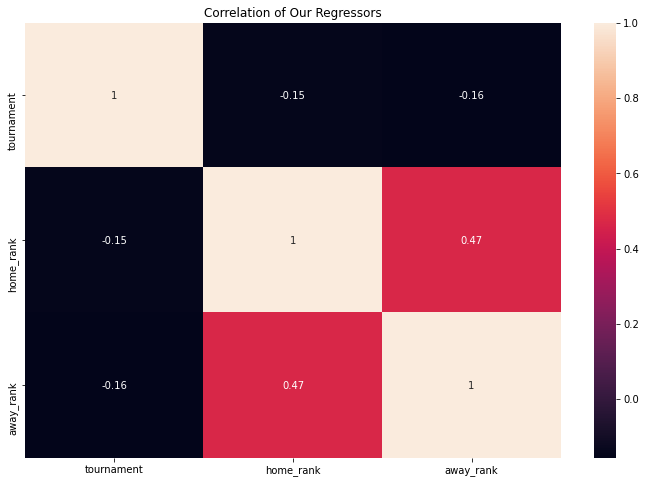

In [300]:
#From the question our regressors are tournament, home and away rank 

#We therefore select them amd store them in the regressor variable

regressors = df[['tournament','home_rank', 'away_rank']]

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(regressors.corr(), annot=True)
plt.title('Correlation of Our Regressors')

In [301]:
regressors.head()

,tournament,home_rank,away_rank
0,26,19,67.0
1,26,70,5.0
2,26,22,35.0
3,26,94,8.0
4,26,58,25.0


In [302]:
# Deriving the Correlations overview
regressors= regressors.corr()

In [303]:
#Computing the Variance Inflection Factor

pd.DataFrame(np.linalg.inv(regressors.values), index = regressors.index, columns=regressors.columns)

,tournament,home_rank,away_rank
tournament,1.032488,0.096487,0.116826
home_rank,0.096487,1.291841,-0.591423
away_rank,0.116826,-0.591423,1.296043


In [304]:
#The VIF for our regressors are the diagonal values from left to right. 
#Our VIFs are about 1. We therefore conclude our variables are not highly correlated. 


# **The Model**

To address the question under study, we will adopt two approaches. Firstly, we will build a linear regression model, derive the Root Mean Square Error and compare it to the current mean of goals scored by a home team. We will then plot the residuals (yhats) against the current explained variable and consider whether it follows the assumptions under the Classical Linear Regression Model. If this is not the case- we determine this by checking for homoscedasticity- we will switch to a higher order regression.



Second step will be building a polynomial regression model, derive its Root Mean Square Value and determine whether it tallies with our expectations. 

# **a.) Linear Regression**

In [385]:
#Displaying our Dataset
df.head(1)

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,41,137,0,0,26,0,1993,19,67.0,Draw


In [386]:
#We first Preprocess Our Data

#How many Goals would a Home Team Score based on its rank, the rank of the Away team
# and the tournament

new_df = df[['home_score','tournament','home_rank', 'away_rank']]

# Specifying our regressors

X = new_df.drop('home_score', axis=1)

#Defining and specifying Our Regressand

y = new_df['home_score']

In [387]:
#Checking our X-values
X.values

array([[26., 19., 67.],
       [26., 70.,  5.],
       [26., 22., 35.],
       ...,
       [25., 12.,  3.],
       [25.,  7.,  5.],
       [25., 14.,  4.]])

In [388]:
#Displaying & Previewing Our Dataset
new_df.shape

(16888, 4)

In [389]:
#Checking shape of our X feature
X.shape

(16888, 3)

In [390]:
#Checking shape of our y feature
y.shape

(16888,)

# Performing the Linear Regression

In [391]:
#Performing a Linear Regression and then compare it with Polynomial Regression

#Importing the train_test_split library
from sklearn.model_selection import train_test_split

#Specifying our train and test variable
#Given the size of our dataset, a test size of 0.3 is appropriate
#We retain the 42 random_state to reshuffle out data to prohibited sorted values
# from being trained leading to erroneous results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [392]:
#Checking length of our X_test
#We expect to see 30% of the data as its length
len(X_test)

5067

In [393]:
#Checking length of X_train
#Should have 70% of the data
len(X_train)

11821

In [394]:
#To carry out the regression, we leverage SKLearn and import Linear Regression
from sklearn.linear_model import LinearRegression

In [395]:
#Instantiate the model
my_model = LinearRegression()


In [396]:
#Training Our Model
#We expose our model(X_train and y_train) to 70% of the data
my_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [397]:
#Testing our model
#Having trained our model, we pass our untrained data- the 30% into the trained
#model and draw predictions of what our new regressands with different 
#feature combinations.
test_prediction = my_model.predict(X_test)

# Model Evaluation

In [318]:
#Performance Evaluation To evaluate the performance of our model, we shall look
#at the following:
#Mean Absolute Error
#Mean Squared Error
#Root Mean Square Error

#The Mean Absolute Error is basically the difference between our predicted
#regressand and the mean value of our initial regressand.

#The Mean Squared Error on the other hand is the squared difference between the
#predicted regressand and the initial regressand. It is squared to remove the 
#cancellation effect of adding points above and below the regression line.

#The Root Mean Square Error on the other hand is the square root of the Mean Squared
#Error and a better measure of the variance as the Mean Square Error punishes
#Any deviations heavily.

In [398]:
#We leverage SKLearn to get the Mean Absolute Error and Mean Squared Error to
#evaluate the performance of our model.
#The appropriate or acceptable levels are domain depended and given that we are
#predicting the number of goals the home team will score, any values far away
#from our true mean would be welcome
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [399]:
#Deriving the average number of goals scored in a match
new_df['home_score'].mean()

1.6035054476551398

In [400]:
#Deriving our absolute values.
#Compared to our mean, the deviation seems to be very high.
#This means we should expect deviations of upto 100%

mea_ln = mean_absolute_error(y_test, test_prediction)
mea_ln

1.0504894370779907

In [401]:
#Computing our RMSE
#Our RMSE deviates by an even higher margin
#Perharps this is not the most appropriate model for this task
rmse_ln = np.sqrt(mean_squared_error(y_test, test_prediction))
rmse_ln

1.4449012914332826

Text(0.5, 1.0, 'Plot of Residual from Linear Model')

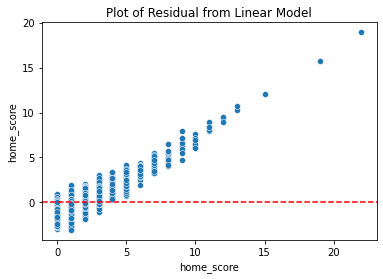

In [323]:
#Plotting Residuals to determine viability of our model
#A residual plot is helpful in determining whether the error
#follows the assumptions of a classical linear regression model, 
#in prticular, that the there is no variance between the errors


#Let's derive the residuals
test_residual = y_test-test_prediction

#Plotting 
sns.scatterplot(x=y_test, y=test_residual)
plt.axhline(y=0, color='red', ls='--')
plt.title('Plot of Residual from Linear Model')

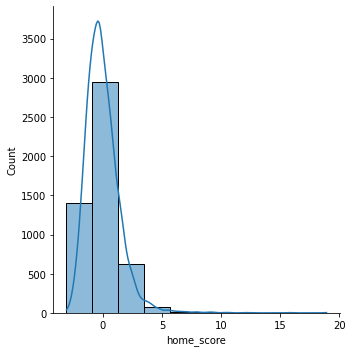

In [324]:
#Visualizing Our Residual Using a Distplot
sns.displot(test_residual, bins=10, kde=True)

It is evident that our residuals are not normally distributed meaning its not linear and a different 
regression model will be required. There is a clear variance in the distribution of our errors as opposed to a constant variance which is the assumption under the classical linear regression model. 

The distribution of the residuals make the case
for Polynomial Regression which is useful for non-linear distributions. 

# **b.) Polynomial Approach**

It has been demonstrated under section 8(a) above that a linear regression model will not be suitable to build a working model. In this section, we shall build a polynomial regression model and compare our results to the model in 8(a). 

Polynomial Regression corrects for non-linearity by the use of higher orders. The features created under a Polynomial Regression have the following Characteristics:


> 1. Have a bias value of 1.0


> 2. Values are raised to a power for each degree


> 3. There is interactions between all pairs of features




In [325]:
#Displaying our dataset
df.head(1)

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,41,137,0,0,26,0,1993,19,67.0,Draw


The Question we are trying to address is building a model that predicts the number of goals a Home team can score in an international match. To do this, we are base our training on variables: tournament, the rank of the away team and the rank of the home team.

# Data Preprocessing and SPlitting

In [415]:
#Data Preprocessing

#Let's first define and specify our regressors and regressands
new_df = df[['home_score','tournament','home_rank', 'away_rank']]


poly_df = new_df

X= poly_df.drop('home_score', axis=1)

y= poly_df['home_score']

In [416]:
#We leverage SKLearn libraries to work with Polynomials

from sklearn.preprocessing import PolynomialFeatures

In [417]:
#Creating an instance of Polynomial Features
#We want to work with second order features so we specify two degrees
#We do not want to include a bias/constant term so we make it False
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [418]:
#Fitting our regressors to a second degree
polynomial_converter.fit(X)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=False,
                   order='C')

In [419]:
#Extracting our Polyfeatures/ high order features
poly_features = polynomial_converter.transform(X)
poly_features

array([[2.600e+01, 1.900e+01, 6.700e+01, ..., 3.610e+02, 1.273e+03,
        4.489e+03],
       [2.600e+01, 7.000e+01, 5.000e+00, ..., 4.900e+03, 3.500e+02,
        2.500e+01],
       [2.600e+01, 2.200e+01, 3.500e+01, ..., 4.840e+02, 7.700e+02,
        1.225e+03],
       ...,
       [2.500e+01, 1.200e+01, 3.000e+00, ..., 1.440e+02, 3.600e+01,
        9.000e+00],
       [2.500e+01, 7.000e+00, 5.000e+00, ..., 4.900e+01, 3.500e+01,
        2.500e+01],
       [2.500e+01, 1.400e+01, 4.000e+00, ..., 1.960e+02, 5.600e+01,
        1.600e+01]])

In [420]:
#We have moved from 3 features to 9 
poly_features.shape

(16888, 9)

In [421]:
#Below are the features we had before transformation.
X.iloc[0]

tournament    26.0
home_rank     19.0
away_rank     67.0
Name: 0, dtype: float64

In [422]:
#Below are our new values.
#THe first 3 values are exactly what we have in our original features
#The forth value is our interaction term and is basically  the square of the 
#first value (26). The fifth term is product of 26 and 19
poly_features[0]

array([  26.,   19.,   67.,  676.,  494., 1742.,  361., 1273., 4489.])

In [334]:
#pf=polynomial_converter.fit_transform(X)

# Training Our Model

In [423]:
#Training our model. We leverage SKLearn Libraries
from sklearn.model_selection import train_test_split

In [424]:
#Splitting Our dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [425]:
#Importing LinearRegression Libraru from SkLearn
from sklearn.linear_model import LinearRegression

In [426]:
#Instantiating our model

model_lr =LinearRegression()

In [427]:
#We fit the model to our data to train 70% of our data
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [428]:
#Having done the training, we use our model to make predictions by passing it
#to data it hasn't seen yet
y_pred = model_lr.predict(X_test)

In [429]:
#Checking the Coefficients in Our Model
model_lr.coef_

array([ 5.24810049e-03, -1.01799089e-02,  5.98288361e-03, -7.18100343e-05,
       -1.75361052e-05,  1.39531592e-06,  2.38230480e-05, -6.04051280e-05,
        7.79793475e-05])

# Model Performance Evaluation

In [430]:
#Same as we did in the Linear regression Section, we leverage SKLearn and
#import mean absolute error and the mean Squared Error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [431]:
#Deriving the absolute mean error and the RSME
poly_mea = mean_absolute_error(y_test, y_pred)

poly_mse=mean_squared_error(y_test, y_pred)

poly_rmse = np.sqrt(poly_mse)

In [432]:
#Comparing Our Results to the Linear Regression, there is no significant change
#Suggesting a case of under fitting. We may need to scale our model to even higher
#orders
print(mea_ln)

print(poly_mea)


print(rmse_ln)
print(poly_rmse)

1.0504894370779907
1.0361370003379242
1.4449012914332826
1.4211130875913234


In [433]:
#Determining the Optimal Degree of higher orders

#We create a For Loop for the various degrees and pass them to our
#model under the respective trainings, make preditions and then derive
#our new rmses 

#The main aim of running this loop is to determine the optimal degree of getting
#higher orders without running the risk of overfitting our model

#Creating lists to store our RMSEs
train_rmse_errors =[]
test_rmse_errors = []


#We specify the various orders of our Polynomial
for d in range(1,10):

  poly_converter =PolynomialFeatures(degree=d, include_bias=False)
  poly_features = polynomial_converter.fit_transform(X)

  X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

  model_lr =LinearRegression()
  model_lr.fit(X_train, y_train)
 

  train_pred = model_lr.predict(X_train)
  test_pred = model_lr.predict(X_test)

  train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)

In [434]:
#We expect our Root Mean Squares to reduce with higher order degrees
test_rmse_errors

[1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234,
 1.4211130875913234]

In [435]:
#We expect our Root Mean Squares to reduce with higher order degrees
train_rmse_errors

[1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772,
 1.4230687690414772]

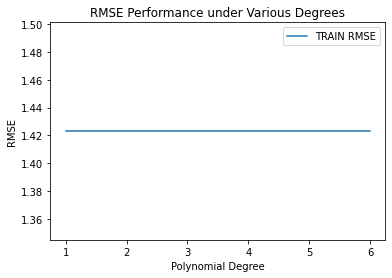

In [436]:
#Visual illustration of what is happening under different degrees 
plt.plot(range(1,7), train_rmse_errors[:6], label='TRAIN RMSE')
plt.title('RMSE Performance under Various Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

# **Checking for Heterodasticity**

In [ ]:
#As discussed above, homoscedasticity is one of the key asssumptions
#under the Classical Linear Regression Model. If the residuals have a
#non-constant varaince and are not centred around the mean then our
#model is heteroscedastic and cannot be used to draw conclusions unless
#transformed or heterosdaticity is fixed.

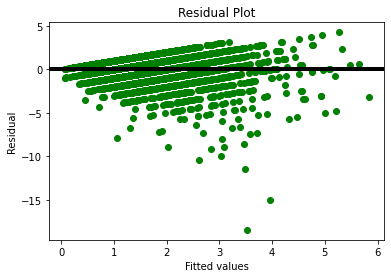

In [438]:
#Computing our residuals
residuals = y_pred- y_test

# Plotting the prediction errors
plt.scatter(y_pred, residuals, color='green')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.axhline(y= residuals.mean(), lw=4, color='black')
plt.show()

In [ ]:
#Applying the Bartlett's test to check whether our residuals are homoscedasticity.
#We are testing the null hypothesis that there is a constant variance in the data
# and that there are no specific patterns.

In [440]:
#Importing Relevant Libraries from SCIPY
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To help us interpret the results we must also compute 
#a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!


It appears that our data has a constant variance and as such our model can be
said to be robust. 

However, from a domain perspective, our RMSE is a little bit problematic. Going by our values, the actual home score average is very close to our RMSE suggesting that for most of the time, our model will be off from the actual results by 100% on average. 


Our Results are therefore not reliable and more training would need to be conducted especially on more regressors to improve our results.

In [ ]:
#Impementing the same process on the away goals. We will be traning our model on 
#Tournament, rank of home team and rank of away team in a bid to predict the
#goals an away team can score


In [441]:
#Data Preprocessing
#Previewing our data
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,41,137,0,0,26,0,1993,19,67.0,Draw
1,138,8,0,1,26,0,1993,70,5.0,Lose
2,184,55,0,0,26,0,1993,22,35.0,Draw
3,187,27,1,5,26,0,1993,94,8.0,Lose
4,152,191,0,0,26,1,1993,58,25.0,Draw


In [444]:
df.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'year', 'home_rank', 'away_rank', 'home_team_status'],
      dtype='object')

In [468]:
#
away_df =df[[ 'away_score','tournament','away_rank','home_rank']]

In [469]:
away_df.head()

,away_score,tournament,away_rank,home_rank
0,0,26,67.0,19
1,1,26,5.0,70
2,0,26,35.0,22
3,5,26,8.0,94
4,0,26,25.0,58


In [472]:
#Preparing our Regressors and Regressands
X= away_df.drop('away_score', axis=1)

y= away_df['away_score']

In [473]:
#We leverage SKLearn libraries to work with Polynomials

from sklearn.preprocessing import PolynomialFeatures

#Creating an instance of Polynomial Features
#We want to work with second order features so we specify two degrees
#We do not want to include a bias/constant term so we make it False
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)


#Fitting our regressors to a second degree
polynomial_converter.fit(X)


#Extracting our Polyfeatures/ high order features
away_features = polynomial_converter.transform(X)
away_features

array([[2.600e+01, 6.700e+01, 1.900e+01, ..., 4.489e+03, 1.273e+03,
        3.610e+02],
       [2.600e+01, 5.000e+00, 7.000e+01, ..., 2.500e+01, 3.500e+02,
        4.900e+03],
       [2.600e+01, 3.500e+01, 2.200e+01, ..., 1.225e+03, 7.700e+02,
        4.840e+02],
       ...,
       [2.500e+01, 3.000e+00, 1.200e+01, ..., 9.000e+00, 3.600e+01,
        1.440e+02],
       [2.500e+01, 5.000e+00, 7.000e+00, ..., 2.500e+01, 3.500e+01,
        4.900e+01],
       [2.500e+01, 4.000e+00, 1.400e+01, ..., 1.600e+01, 5.600e+01,
        1.960e+02]])

In [474]:
X.iloc[0]

tournament    26.0
away_rank     67.0
home_rank     19.0
Name: 0, dtype: float64

In [475]:
#Training our model. We leverage SKLearn Libraries
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(away_features, y, test_size=0.33, random_state=42)


#Importing LinearRegression Libraru from SkLearn
from sklearn.linear_model import LinearRegression

#Instantiating our model

model_away =LinearRegression()

model_away.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [476]:
#Predicting Our Regressands
y_pred = model_away.predict(X_test)

In [477]:
#Evaluating THe Performance Of our model
away_mea = mean_absolute_error(y_test, y_pred)

away_mse=mean_squared_error(y_test, y_pred)

away_rmse = np.sqrt(poly_mse)

In [478]:
away_rmse

1.4211130875913234

# **b) Logistic Regression**

In [358]:
#We apply Logistic Regression to build a model that predicts the outcome of a
#football match i.e whether it is a win, draw or lose (W, L, D)

#The first step is splititng our data into Training and Testing and then Scaling

In [359]:
#Previewing Our Dataset
df_log= df
df_log.head()

,home_team,away_team,home_score,away_score,tournament,neutral,year,home_rank,away_rank,home_team_status
0,41,137,0,0,26,0,1993,19,67.0,Draw
1,138,8,0,1,26,0,1993,70,5.0,Lose
2,184,55,0,0,26,0,1993,22,35.0,Draw
3,187,27,1,5,26,0,1993,94,8.0,Lose
4,152,191,0,0,26,1,1993,58,25.0,Draw


# 1. Train-Test Split and Scaling

In [360]:
#Although Home_Team_Status class is a string
#we would not need to encodeit beacause for labels this is not necessary
# under SciKit Learn



#Splitting our dataset into regressors and regressand variables in
#preparation for training

X = df.drop(['year', 'home_team', 'away_team', 'home_score', 'away_score', 'home_team_status'], axis=1)
y= df['home_team_status']

In [361]:
#Importing the train_test_split library from SKLearn to split the data
from sklearn.model_selection import train_test_split


In [362]:

#TO determine our findings, we will need to compare the various 
#coefficients we derive, we scale our data to allow for
# a fair comparison

#Importing a Standard Scaler from SkLearn
from sklearn.preprocessing import StandardScaler

In [363]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [364]:
#Scaling our X_train variables
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)

In [365]:
#We scale our X_test as above.
#NB. We dot fit our test data as that only applies to our training data
#We do not want any leakages from our training data including scaling data
scaled_X_test = scaler.transform(X_test)

# 2. Implementing Logistic Regression

In [366]:
#Let's import the Logistic Regression Model

from sklearn.linear_model import LogisticRegression


In [367]:
#To help us carry out cross validation to ensure robutness of our model
from sklearn.model_selection import GridSearchCV

In [368]:
log_model = LogisticRegression(solver='saga', multi_class="ovr", max_iter=5000)

In [369]:
#Specifying the penalty type

penalty = ['l1', 'l2', 'elasticnet']
l1_ratio =np.linspace(0,1,10)

#Spacing C Values Logarithmically

C = np.logspace(0, 1, 10)

param_grid = {'penalty':penalty, 'l1_ratio':l1_ratio, 'C':C}

In [370]:
#Setting up our GridModel

grid_model =GridSearchCV(log_model, param_grid=param_grid)

In [371]:
grid_model.fit(scaled_X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (p

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([ 1.        ,  1.29154967,  1.66810054,  2.15443469,  2.7825594 ,
        3.59381366,  4.64158883,  5.9948425 ,  7.74263683, 10.        ]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 

In [372]:
#Evaluating our Performance

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [373]:
y_pred= grid_model.predict(scaled_X_test)

In [374]:
y_pred

array(['Win', 'Lose', 'Lose', ..., 'Win', 'Win', 'Win'], dtype=object)

In [375]:
grid_model.best_params_

{'C': 2.154434690031884,
 'l1_ratio': 0.5555555555555556,
 'penalty': 'elasticnet'}

In [376]:
accuracy_score(y_test, y_pred)

0.5800276297611999

In [377]:
confusion_matrix(y_test, y_pred)

array([[   0,  390,  824],
       [   0,  833,  584],
       [   0,  330, 2106]])

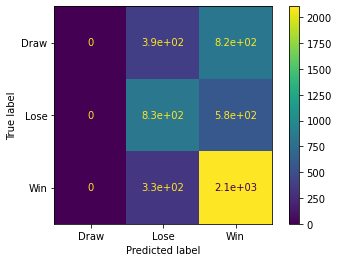

In [378]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [379]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Draw       0.00      0.00      0.00      1214
        Lose       0.54      0.59      0.56      1417
         Win       0.60      0.86      0.71      2436

    accuracy                           0.58      5067
   macro avg       0.38      0.48      0.42      5067
weighted avg       0.44      0.58      0.50      5067



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [380]:
from sklearn.metrics import roc_curve, auc

In [381]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

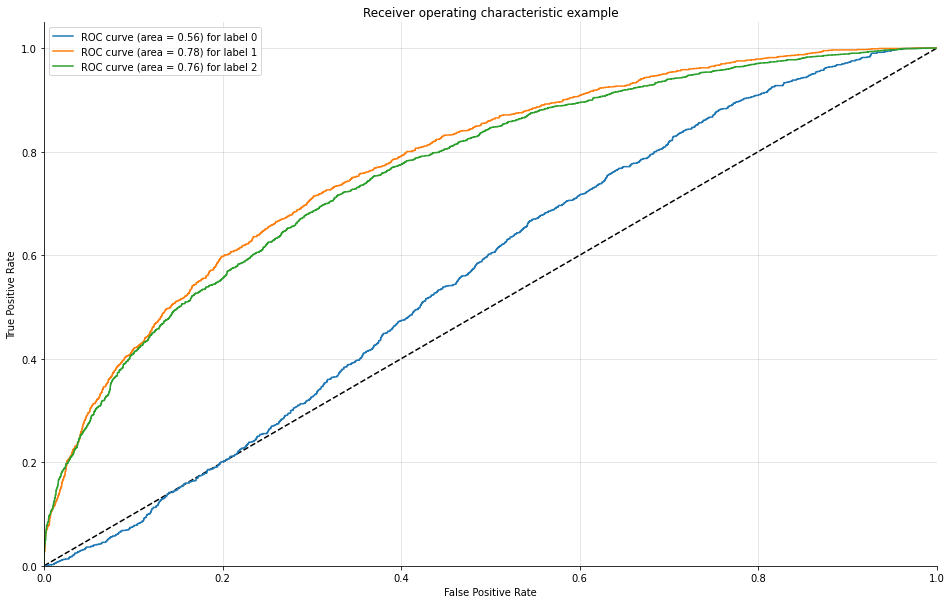

In [382]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

**Challenging the Solution**

Our Model appears to be very precise. However, when we look at the RMSEs or the expexted deviations, we are not bullish about using this model to predict scorelines of other matches. 

**Follow Up Questions**

1. Did we have the right data? No, we did not have enough data and features to train our data on. 
In real life, type of tournamentwould have almost zero bearing on whether a team scores or not. The
motivation to score goals would likely be the same as playing for ones country is a matter of honour and pride

2. Did we have the right question? No, maybe preidcting a country's rank given our data would have been a better question